#CS201A
Foundations of Data Science

Practical



##Task 1: Data visualisation and pre-processing

Housing is a central part of the New Zealand economy and accounts for around half of the assets of New
Zealand households. Data is available from 1979.
The value of housing stock includes all private sector residential dwellings (detached houses, flats and
apartments), lifestyle blocks (with a dwelling), detached houses converted to flats and ‘home and income'
properties. It does not include vacant land. This is an estimate of the current market value of houses in New
Zealand and is based on current house prices. The data is compiled by CoreLogic and published by the Reserve
Bank. Data from 1979 is available in the key graph data file.

##How many records are official QV data?

There are total of official QV data is 81

###How many records are RBNZ estimate?

There are total of 88 records in RBNZ estimate

###Read the CSV file as a Pandas data frame

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_excel("graphdata.xlsx", sheet_name ="HOUSING")

I am formatting the data here to make it easier to read. I converted the graphdata.xlsx to 'csv' and added some parameter of which rows and columns I want to display. I added a header for the date and some slight formatting of the other headers

In [ ]:
df.to_csv("HOUSING")

In [ ]:
housing = pd.read_csv('HOUSING', header = 5, usecols = (2,3,4,5), skiprows=[175,176,177,178,179])

In [ ]:
housing.columns = ['Date','Value of Housing $Billion','House Prices - RBNZ Linked all Residential HPI Series A%','HPI for Houses, Index']
housing['Date'] = pd.to_datetime(housing['Date'])

In [ ]:
housing

,Date,Value of Housing $Billion,House Prices - RBNZ Linked all Residential HPI Series A%,"HPI for Houses, Index"
0,1979-12-01,25.0,NaN,NaN
1,1980-03-01,25.0,NaN,NaN
2,1980-06-01,26.0,NaN,NaN
3,1980-09-01,27.0,NaN,NaN
4,1980-12-01,28.0,NaN,NaN
...,...,...,...,...
164,2020-12-01,1385.7,16.1,3080.9
165,2021-03-01,1513.0,22.7,3379.1
166,2021-06-01,1591.5,28.5,3495.0
167,2021-09-01,1663.1,28.7,3704.3


###Get statistics of the data using python

In [ ]:
housing.describe()

,Value of Housing $Billion,House Prices - RBNZ Linked all Residential HPI Series A%,"HPI for Houses, Index"
count,169.000000,125.000000,129.000000
mean,425.053254,7.076000,1337.831783
std,394.275427,7.385987,802.662676
min,25.000000,-9.000000,466.300000
25%,123.000000,2.300000,695.900000
50%,232.000000,6.400000,1299.900000
75%,613.700000,12.300000,1714.900000
max,1763.100000,28.700000,3893.500000


###Does the data contain missing values?

Yes, we do have missing values

In [ ]:
housing.isnull().values.any()

True

This are the amount of missing values for each column

In [ ]:
housing.isnull().sum()

Date                                                         0
Value of Housing $Billion                                    0
House Prices - RBNZ Linked all Residential HPI Series A%    44
HPI for Houses, Index                                       40
dtype: int64

This is the total summation of all missing values in the Dataframe

In [ ]:
housing.isnull().sum().sum()

84

###Draw the graph of House prices annual change (in percentage) using matplotlib or seaborn using a suitable chart of your choice.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

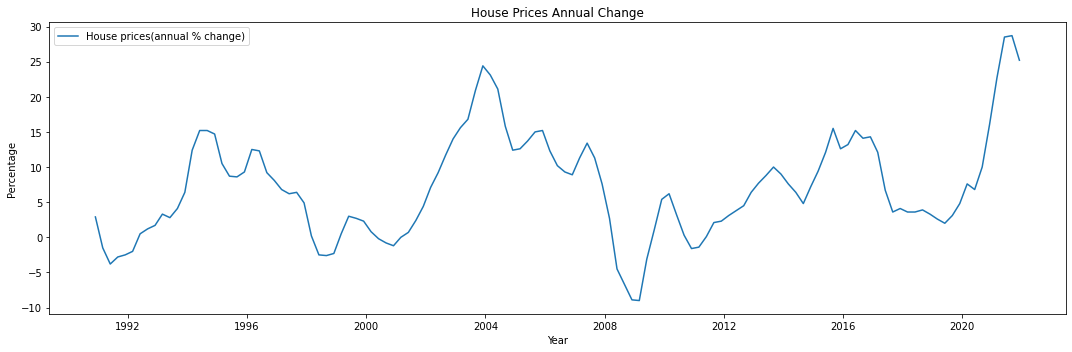

In [ ]:
plt.figure(figsize=(15,5))
plt.title('House Prices Annual Change')
plt.ylabel('Percentage')
plt.xlabel('Year')


plt.plot(housing['Date'] ,housing['House Prices - RBNZ Linked all Residential HPI Series A%'],Label="House prices(annual % change)")
plt.legend()
plt.tight_layout()
plt.show()

###Combine the previous graph with a graph of HPI for houses

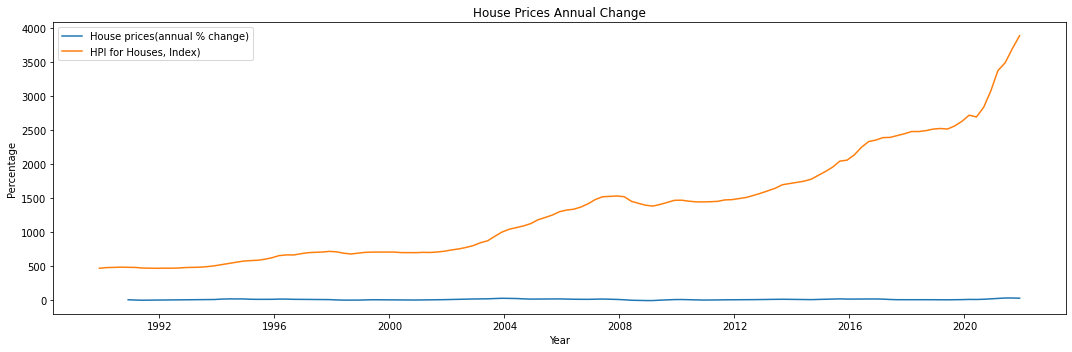

In [ ]:
plt.figure(figsize=(15,5))
plt.title('House Prices Annual Change')
plt.ylabel('Percentage')
plt.xlabel('Year')

plt.plot(housing['Date'] ,housing['House Prices - RBNZ Linked all Residential HPI Series A%'],Label="House prices(annual % change)")
plt.plot(housing['Date'] ,housing['HPI for Houses, Index'],Label="HPI for Houses, Index)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

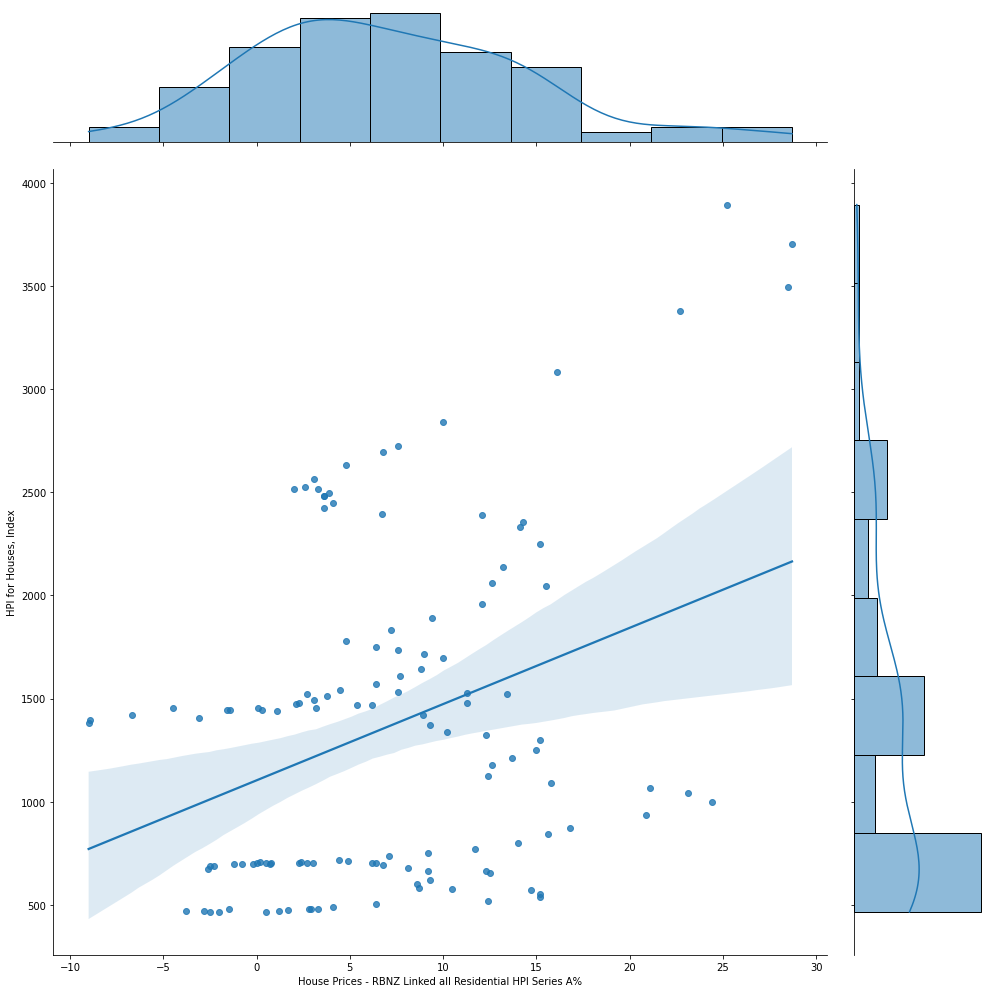

In [ ]:
anual = housing['House Prices - RBNZ Linked all Residential HPI Series A%']
hpi = housing['HPI for Houses, Index']

df1 = sns.jointplot(x=anual,y=hpi,data=hpi,kind='reg')
#df2 = sns.jointplot(x=hpi,y=hpi,data=anual,kind='reg')

df1.fig.set_size_inches(15,15)
#df2.fig.set_size_inches(15,15)

###What can you tell about the trend of the housing price in New Zealand?

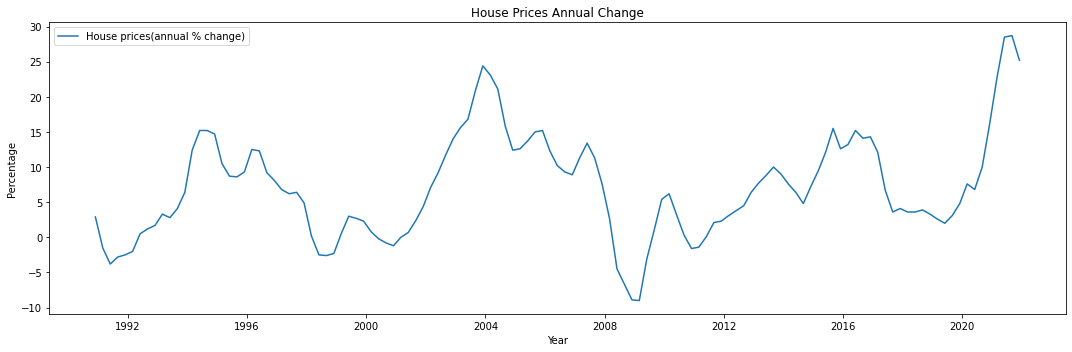

Throughout 1990 to 2022 the house prices had some irregular changes. Between 1990 and 1996 
it had a spiked in house price in 1995 but after 1996 it slowly went down which in 1999 we saw
decline of house price.

During 2001 the house price was going up and we got a huge spike on housing price between 2001 and 2004 then it slowly
went down and in 2009 it had the lowest house price throughout 1990 to 2022.

After 2009 to 2019 prices was going up and down but on 2020 we saw another spike on house prices.

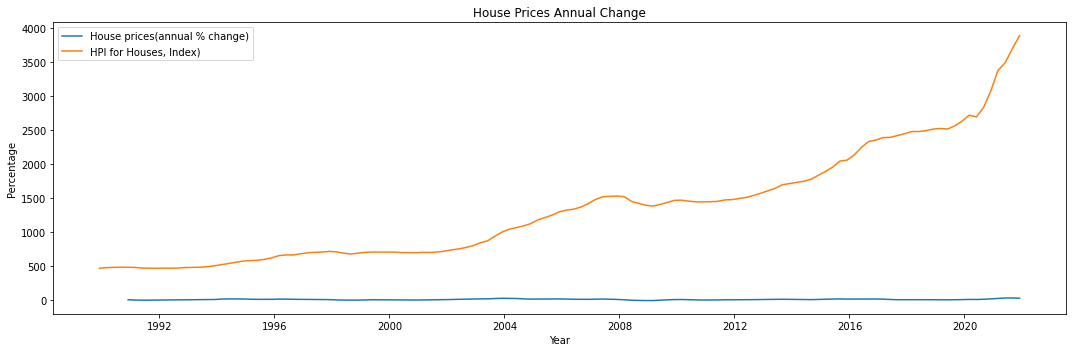

The HPI for house was slowly going on the rise from 1990 to 2020

#Task 2

##Random Forest

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_test = pd.read_csv("/content/mnist_test.csv")
df_train = pd.read_csv("/content/mnist_train.csv")

In [ ]:
df_train['target'] = df_train.iloc[:, 0]

In [ ]:
df_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['target'], axis='columns'),df_train.iloc[:, 0],test_size = 0.333,random_state=10, stratify=df_train.iloc[:, 0])

In [ ]:
X_train.shape,y_train.shape

((40019, 785), (40019,))

In [ ]:
X_test.shape,y_test.shape

((19980, 785), (19980,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, y_test)

0.9855355355355355

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predicted,y_test)

0.9855355355355355

In [ ]:
train_accuracy_default_params = model.score(X_train, y_train)
test_accuracy_default_params = model.score(X_test, y_test)

print(f'Train Accuracy - : {train_accuracy_default_params:.3f}')
print(f'Test Accuracy - : {test_accuracy_default_params:.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.986


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1964,    0,    2,    1,    1,    0,    0,    0,    2,    2],
       [   0, 2225,   10,    2,    4,    1,    0,    2,    1,    0],
       [   3,    1, 1956,    9,    2,    1,    1,    5,    6,    0],
       [   0,    1,   18, 1990,    2,    6,    1,    9,   11,    4],
       [   0,    4,    2,    1, 1922,    0,    8,    3,    4,    2],
       [   2,    0,    1,   10,    3, 1768,   12,    2,    4,    3],
       [   2,    0,    0,    0,    1,   13, 1949,    0,    6,    0],
       [   1,    2,    6,    3,    5,    0,    0, 2063,    2,    4],
       [   1,    2,    2,    5,    3,    8,    7,    2, 1910,    8],
       [   1,    1,    0,    2,    3,    2,    1,   14,   13, 1944]])

Text(114.0, 0.5, 'Truth')

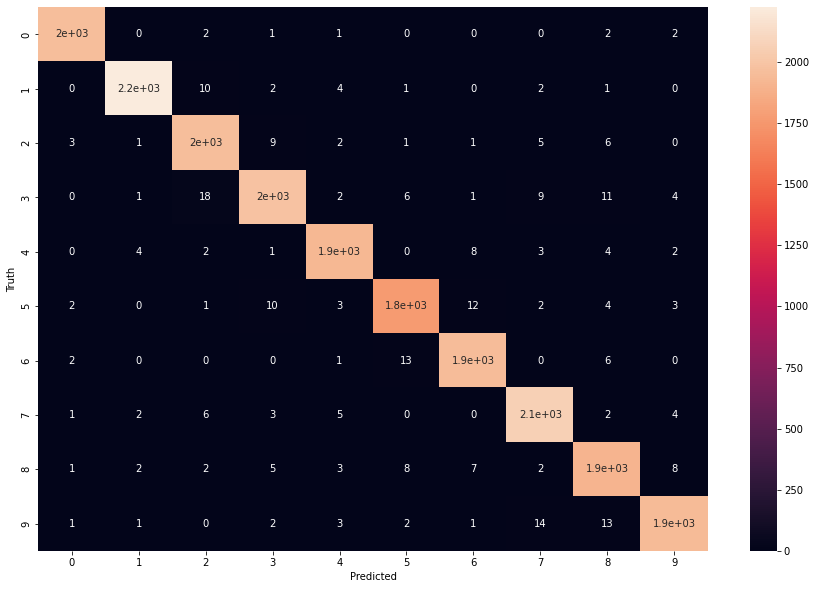

In [ ]:
import seaborn as sn

plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import classification_report
# View the classification report for test data and predictions
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1972
           1       1.00      0.99      0.99      2245
           2       0.98      0.99      0.98      1984
           3       0.98      0.97      0.98      2042
           4       0.99      0.99      0.99      1946
           5       0.98      0.98      0.98      1805
           6       0.98      0.99      0.99      1971
           7       0.98      0.99      0.99      2086
           8       0.97      0.98      0.98      1948
           9       0.99      0.98      0.98      1981

    accuracy                           0.99     19980
   macro avg       0.99      0.99      0.99     19980
weighted avg       0.99      0.99      0.99     19980



###Evaluation

Using the default parameters with Random Forest we were able to get a good accuracy score for our model. It doesn't seem our Training test is overfitting. The confusion matrix shows that the predicted value is high.

###Random Forest Hyperparameter Tuning

In [ ]:
#Number of tress in random forest
n_estimators = np.arange(10,210,10)
# Number of features to consider at every split
max_features=['auto','sqrt']
# Maximum number of levels in tree
max_depth = np.arange(10,60,10)
# Mininum number of samples requried to split a node
min_samples_split = np.arange(1,11,1)
# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(1,11,1)
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [ ]:
#Create param grid

param_grid = {'n_estimators' :n_estimators,
              'max_features' :max_features,
              'max_depth' :max_depth,
              'min_samples_split' :min_samples_split,
              'min_samples_leaf' :min_samples_leaf,
              'bootstrap' :bootstrap}
print(param_grid)

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([10, 20, 30, 40, 50]), 'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'bootstrap': [True, False]}


In [ ]:
rf_model = RandomForestClassifier()

###GridSearchCV find the the best hyperparamter

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train,y_train)

In [ ]:
rf_Grid.best_params_

####Important
The GridSearchCV is taking way to long to compile I have it running for 3 hours but it is still going it had to do Fitting 5 folds for each of 40000 candidates, totalling 200000 fits. So I decided to use another way for tuning

###Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([10, 20, 30, 40, 50]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
                   verbose=2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits. 

In [ ]:
rf_RandomGrid.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 110}

In [ ]:
model = RandomForestClassifier(n_estimators = 110, max_features = 'sqrt',bootstrap = False, max_depth = 50, min_samples_leaf = 3, min_samples_split = 7)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=110)

In [ ]:
model.score(X_test, y_test)

0.9853853853853853

In [ ]:
train_accuracy_hyper_params = model.score(X_train, y_train)
test_accuracy_hyper_params = model.score(X_test, y_test)
print(f'Train Accuracy - : {train_accuracy_hyper_params:.3f}')
print(f'Test Accuracy - : {test_accuracy_hyper_params:.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.985


In [ ]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1962,    0,    3,    0,    3,    0,    0,    0,    4,    0],
       [   0, 2221,   11,    4,    4,    0,    0,    2,    3,    0],
       [   4,    0, 1956,    8,    4,    0,    2,    5,    5,    0],
       [   0,    1,   22, 1985,    1,    6,    0,   13,    9,    5],
       [   1,    4,    2,    0, 1918,    0,    8,    4,    4,    5],
       [   1,    0,    1,   13,    3, 1766,   11,    2,    5,    3],
       [   0,    1,    0,    0,    2,   15, 1951,    0,    2,    0],
       [   1,    3,    6,    2,    2,    0,    0, 2063,    2,    7],
       [   0,    1,    1,    8,    4,    7,    4,    1, 1919,    3],
       [   1,    0,    0,    3,    2,    3,    0,   12,   13, 1947]])

In [ ]:
from sklearn.metrics import classification_report
# View the classification report for test data and predictions
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1972
           1       1.00      0.99      0.99      2245
           2       0.98      0.99      0.98      1984
           3       0.98      0.97      0.98      2042
           4       0.99      0.99      0.99      1946
           5       0.98      0.98      0.98      1805
           6       0.99      0.99      0.99      1971
           7       0.98      0.99      0.99      2086
           8       0.98      0.99      0.98      1948
           9       0.99      0.98      0.99      1981

    accuracy                           0.99     19980
   macro avg       0.99      0.99      0.99     19980
weighted avg       0.99      0.99      0.99     19980



###Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
k = cross_val_score(RandomForestClassifier(), X_train, y_train)

In [ ]:
cvs_score  = k.mean()
cvs_std  = k.std()

In [ ]:
from sklearn.metrics import classification_report
# View the classification report for test data and predictions
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1972
           1       1.00      0.99      0.99      2245
           2       0.98      0.99      0.98      1984
           3       0.98      0.97      0.98      2042
           4       0.99      0.99      0.99      1946
           5       0.98      0.98      0.98      1805
           6       0.99      0.99      0.99      1971
           7       0.98      0.99      0.99      2086
           8       0.98      0.99      0.98      1948
           9       0.99      0.98      0.99      1981

    accuracy                           0.99     19980
   macro avg       0.99      0.99      0.99     19980
weighted avg       0.99      0.99      0.99     19980



###Evaluation
Unlike GridSearchCV were it will take all the estimators and combination and do a number of folds, The time it will take to find the best model will depend on how many estimators and combination and folds you have.

While Randomized Search CV it will go through random parameter combination and it will have significantly lower combination to run through to find the best model which is I think is better because Google Colab has a limit on how long you can run you notebook hence using Randomized Search CV in this situation is a better choice.

In [ ]:
test_outcome = {'Model':['Random Forest Default Parameters', 'Random Forest Hypertuning','Random Forest Cross Validation'],
                'Train Accuracy': [train_accuracy_default_params,train_accuracy_hyper_params,train_accuracy_hyper_params],
                'Test Accuracy': [test_accuracy_default_params,test_accuracy_hyper_params,cvs_score ],
                }

In [ ]:
pd.DataFrame(test_outcome)

,Model,Train Accuracy,Test Accuracy
0,Random Forest Default Parameters,1.000000,0.985536
1,Random Forest Hypertuning,0.999925,0.985385
2,Random Forest Cross Validation,0.999925,0.982433


As you can see in the table there isn't much difference when it comes to the outcome. With the default parameters I was still able to get a good score of my test and the same thing can be said by the other model that was used.

The default parameter did well compared to the other 2 probably fine tuning the parameters will get us a better result

Did the training overfit? I dont believe it did the training score and test score shows this and we can also see it in the classification report. 

Based in my understanding the RandomForest uses multiple decision tree and takes a majority vote which in turn creates a low variance so  thats why our training score is very close witht the test score.

##Decision Tree

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_test = pd.read_csv("/content/mnist_test.csv")
df_train = pd.read_csv("/content/mnist_train.csv")

In [ ]:
df_data = df_train.iloc[:,1:]

In [ ]:
df_data.shape

(59999, 784)

In [ ]:
df_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_label = df_train.iloc[:,0]

In [ ]:
df_label

0        0
1        4
2        1
3        9
4        2
        ..
59994    8
59995    3
59996    5
59997    6
59998    8
Name: 5, Length: 59999, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size = 0.333, random_state = 101,stratify =df_label)#

In [ ]:
X_train.shape, X_test.shape

((40019, 784), (19980, 784))

In [ ]:
y_train.shape, y_test.shape

((40019,), (19980,))

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_model.score(X_test,y_test)

0.8582082082082082

###Check the training if we are overfitting

In [ ]:
dt_train_accuracy_default_params = dt_model.score(X_train, y_train)
dt_test_accuracy_default_params = dt_model.score(X_test, y_test)
print(f'Train Accuracy - : {dt_train_accuracy_default_params:.3f}')
print(f'Test Accuracy - : {dt_test_accuracy_default_params:.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.858


Training score is perfect as predicted but the test accuracy is far from desirable our model is overfitting.

###Decision Tree Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {'max_depth': np.arange(10,210,10),
              'criterion':('gini','entropy'),
              'max_leaf_nodes':np.arange(1,11,1),
              'max_features':('auto','sqrt','log2'),
              'min_samples_split':(2,4,6,8)
              }

In [ ]:
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': (2, 4, 6, 8)},
                   verbose=True)

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=190, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_split=4)

###Check Accuracy

In [ ]:
DT_Model = DecisionTreeClassifier(max_depth=190, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_split=4)

In [ ]:
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=190, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_split=4)

In [ ]:
dt_train_accuracy_hyper_params  = DT_Model.score(X_train, y_train)
dt_test_accuracy_hyper_params  = DT_Model.score(X_test, y_test)
print(f'Train Accuracy - : {dt_train_accuracy_hyper_params:.3f}')
print(f'Test Accuracy - : {dt_test_accuracy_hyper_params:.3f}')

Train Accuracy - : 0.409
Test Accuracy - : 0.409


###Changing the max_depth

In [ ]:
train_accuracy = []
validation_accuracy  = []
for depth in range(1,16):
  DT_Model = DT_Model = DecisionTreeClassifier(max_depth=16, max_features='sqrt', max_leaf_nodes=9,
                       min_samples_split=4)
  DT_Model.fit(X_train,y_train)
  train_accuracy.append(DT_Model.score(X_train, y_train))
  validation_accuracy.append(DT_Model.score(X_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,16),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame

,max_depth,train_acc,valid_acc
0,1,0.414053,0.407407
1,2,0.467153,0.464064
2,3,0.404608,0.406206
3,4,0.437992,0.442943
4,5,0.452585,0.450250
5,6,0.463280,0.462763
6,7,0.441065,0.441892
7,8,0.453085,0.451351
8,9,0.474450,0.469570
9,10,0.467628,0.463113


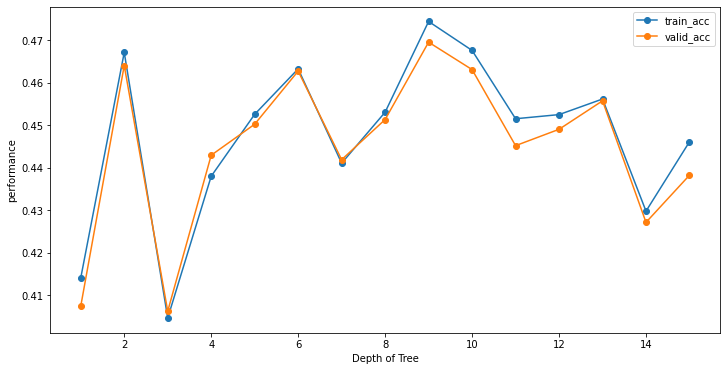

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o',label=('train_acc'))
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o',label=('valid_acc'))
plt.xlabel('Depth of Tree')
plt.ylabel('performance')
plt.legend()

This is just testing how changing the parameter will change the outcome of the test.

###Evaluation

In [ ]:
test_outcome2 = {'Model':['Decision Tree Default Parameters', 'Decision Tree with Hyperparameters'],
                'Train Accuracy': [dt_train_accuracy_default_params ,dt_train_accuracy_hyper_params  ],
                'Test Accuracy': [dt_test_accuracy_default_params ,dt_test_accuracy_hyper_params]}

In [ ]:
pd.DataFrame(test_outcome2)

,Model,Train Accuracy,Test Accuracy
0,Decision Tree Default Parameters,1.000000,0.858208
1,Decision Tree with Hyperparameters,0.409131,0.408559


With the default parameter of Decision Tree we are overfitting our training to combat this I used hypertuning to lower the bias but the result wasn't as desirable as I hoped it would be. Fine tuning the parameters again might increase the result but not much,is my guess I believe decision tree isn't a best fit for this type of training.

###K Nearest Neighbors

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_test = pd.read_csv("/content/mnist_test.csv")
df_train = pd.read_csv("/content/mnist_train.csv")

In [ ]:
knn_data = df_train.iloc[:,1:]
knn_label = df_train.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(knn_data, knn_label, test_size = 0.333, random_state = 101, stratify = knn_label)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.9684184184184185

In [ ]:
knn_train_accuracy_def_params  = knn.score(X_train, y_train)
knn_test_accuracy_def_params  = knn.score(X_test, y_test)

In [ ]:
print(f'Train Accuracy - : {knn_train_accuracy_def_params:.3f}')
print(f'Test Accuracy - : {knn_test_accuracy_def_params:.3f}')

Train Accuracy - : 0.979
Test Accuracy - : 0.968


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1960,    1,    0,    0,    1,    1,    8,    0,    0,    1],
       [   0, 2238,    4,    1,    0,    0,    0,    1,    0,    1],
       [   8,   21, 1901,    6,    5,    4,    6,   27,    3,    3],
       [   4,    5,   14, 1958,    1,   26,    0,   10,   12,   12],
       [   2,   22,    1,    1, 1877,    0,    4,    2,    1,   36],
       [   8,    4,    1,   20,    5, 1732,   20,    3,    3,    9],
       [  10,    3,    0,    1,    4,    8, 1944,    0,    1,    0],
       [   0,   18,    4,    1,    5,    0,    0, 2033,    1,   24],
       [   5,   29,    5,   22,   13,   27,   10,    7, 1805,   25],
       [   3,    4,    1,   20,   17,    3,    0,   31,    1, 1901]])

Text(114.0, 0.5, 'Truth')

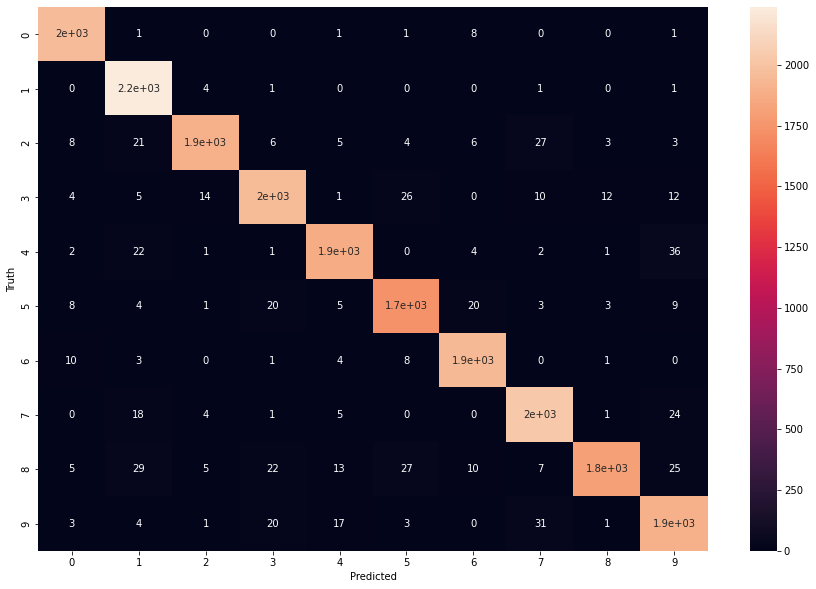

In [ ]:
import seaborn as sn

plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1972
           1       0.95      1.00      0.98      2245
           2       0.98      0.96      0.97      1984
           3       0.96      0.96      0.96      2042
           4       0.97      0.96      0.97      1946
           5       0.96      0.96      0.96      1805
           6       0.98      0.99      0.98      1971
           7       0.96      0.97      0.97      2086
           8       0.99      0.93      0.96      1948
           9       0.94      0.96      0.95      1981

    accuracy                           0.97     19980
   macro avg       0.97      0.97      0.97     19980
weighted avg       0.97      0.97      0.97     19980



###Evaluation

Using the default parameters for K Nearest Neighbor we also see a good turn out just like the random forest. We can see that we are getting a high accuracy score.

###K Nearest Neighbors Hyperparameter Tuning


In [ ]:
train_accuracy = []
validation_accuracy  = []
for n in range(1,16):
  knn_Model = KNeighborsClassifier(n_neighbors=n)
  knn_Model.fit(X_train,y_train)
  train_accuracy.append(knn_Model.score(X_train, y_train))
  validation_accuracy.append(knn_Model.score(X_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,16),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame

,max_depth,train_acc,valid_acc
0,1,1.000000,0.969670
1,2,0.983658,0.962613
2,3,0.984158,0.968869
3,4,0.980109,0.967417
4,5,0.978660,0.968418
5,6,0.976461,0.966366
6,7,0.974887,0.965866
7,8,0.973263,0.964364
8,9,0.972663,0.964464
9,10,0.970914,0.963063


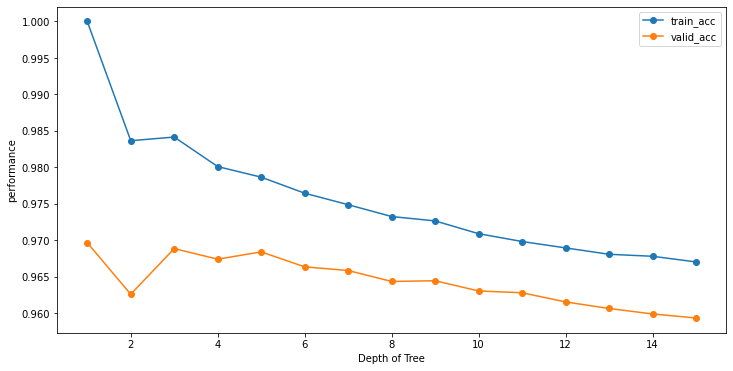

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o',label=('train_acc'))
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o',label=('valid_acc'))
plt.xlabel('Depth of Tree')
plt.ylabel('performance')
plt.legend()

###Evaluation

In this test we check how changing the n_neighbors will drastically change the model. We got the highest test score by having the n_neighbors to 1

In [ ]:
knn_train_accuracy_hyper_params = train_accuracy[0]
knn_test_accuracy_hyper_params = validation_accuracy[0]

knn_train_accuracy_def_params  = knn.score(X_train, y_train)
knn_test_accuracy_def_params  = knn.score(X_test, y_test)

###Conclusion

In [ ]:
final_outcome = {'Model':['Default Parameters', 'Hyperparameter Tuning'],
                'Decision Tree Train Accuracy': [dt_train_accuracy_default_params ,dt_train_accuracy_hyper_params  ],
                'Decision Tree Test Accuracy': [dt_test_accuracy_default_params ,dt_test_accuracy_hyper_params],
                'Random Forest Train Accuracy': [train_accuracy_default_params,train_accuracy_hyper_params],
                'Random Forest Test Accuracy': [test_accuracy_default_params,test_accuracy_hyper_params],
                'K Nearest Neighbors Train Accuracy': [knn_train_accuracy_def_params,knn_train_accuracy_hyper_params],
                'K Nearest Neighbors Test Accuracy': [knn_test_accuracy_def_params,knn_test_accuracy_hyper_params]}   

In [ ]:
table = pd.DataFrame(final_outcome)
table.T

,0,1
Model,Default Parameters,Hyperparameter Tuning
Decision Tree Train Accuracy,1.0,0.409131
Decision Tree Test Accuracy,0.858208,0.408559
Random Forest Train Accuracy,1.0,0.999925
Random Forest Test Accuracy,0.985536,0.985385
K Nearest Neighbors Train Accuracy,0.97866,1.0
K Nearest Neighbors Test Accuracy,0.968418,0.96967


With all the three model tested Random Forest comes at the top. With just the default parameters it had the highest accuracy compared to other models. For this brief testing Random Forest is the best choice.